# Nama Kelompok :
1. wahyu Aril Saputra (200411100055) (ketua)
2. Billy Morgen Simbolon (200411100057) (anggota)

https://github.com/wahyuarilsaputra/kelompokpro


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BBTN.JK.csv')
dataFrame = pd.DataFrame(data)
dataFrame.shape

(247, 7)

In [3]:
data = pd.read_csv('BBTN.JK.csv')
dataFrame = pd.DataFrame(data)
dataFrame.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,1495.0,1510.0,1470.0,1490.0,1438.684570,13594300
1,2022-06-16,1500.0,1515.0,1495.0,1500.0,1448.340210,25436000
2,2022-06-17,1485.0,1495.0,1470.0,1480.0,1429.029053,17891900
3,2022-06-20,1500.0,1500.0,1455.0,1465.0,1414.545654,13066800
4,2022-06-21,1475.0,1495.0,1475.0,1485.0,1433.856812,10315100
5,2022-06-22,1495.0,1525.0,1480.0,1490.0,1438.684570,17014700
6,2022-06-23,1490.0,1495.0,1475.0,1480.0,1429.029053,9181200
7,2022-06-24,1500.0,1500.0,1485.0,1485.0,1433.856812,7421300
8,2022-06-27,1495.0,1505.0,1490.0,1500.0,1448.340210,7768200
9,2022-06-28,1500.0,1500.0,1485.0,1500.0,1448.340210,6500100


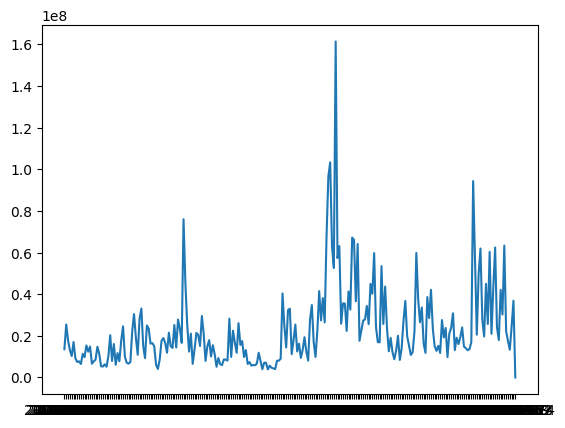

In [4]:
X = data['Date']
y = data['Volume']
plt.plot(X,y)
# print(y.shape)

In [11]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # Mencari n akhir
    end_ix = i + n_steps
    # Memeriksa urutan terluar dari data
    if end_ix > len(sequence)-1:
      break
    # Menambahkan bagian input dan output
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    # print(seq_x, seq_y)
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

# Menentukan Waktu dari data time series
jmlh_X = 4
print('Shapes Target = ',y.shape)
#Split data fitur dan target
X, y = split_sequence(y, jmlh_X)
print('Shapes X = ',X.shape)
print('Shapes Y = ',y.shape)

Shapes Target =  (243,)
Shapes X =  (239, 4)
Shapes Y =  (239,)


In [6]:
newFitur = pd.DataFrame(X, columns=['t-'+str(i+1) for i in range(jmlh_X-1, -1,-1)])
newTarget = pd.DataFrame(y, columns=['Data Prediksi'])

In [7]:
newData = pd.concat([newFitur,newTarget], axis=1)
newData

,t-4,t-3,t-2,t-1,Data Prediksi
0,13594300,25436000,17891900,13066800,10315100
1,25436000,17891900,13066800,10315100,17014700
2,17891900,13066800,10315100,17014700,9181200
3,13066800,10315100,17014700,9181200,7421300
4,10315100,17014700,9181200,7421300,7768200
...,...,...,...,...,...
238,42089100,30234200,63340400,22158200,17533200
239,30234200,63340400,22158200,17533200,13335000
240,63340400,22158200,17533200,13335000,24541800
241,22158200,17533200,13335000,24541800,36874200


In [16]:
from sklearn.preprocessing import MinMaxScaler
training_set = newData.iloc[:100, 1:2].values
test_set = newData.iloc[100:, 1:2].values
scaler = MinMaxScaler(feature_range = (0, 1))
data_training = scaler.fit_transform(training_set)
X_train = []
y_train = []
x = 5
for i in range(x, len(training_set)):
    X_train.append(data_training[i-x:i, 0])
    y_train.append(data_training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
xtrainbaru = np.reshape(X_train, (95, 5))
X_train.shape

(95, 5, 1)